In [68]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [69]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [71]:
dataset = pd.read_csv('bike share train.csv')
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [131]:
dataset.columns.unique()

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')

In [72]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


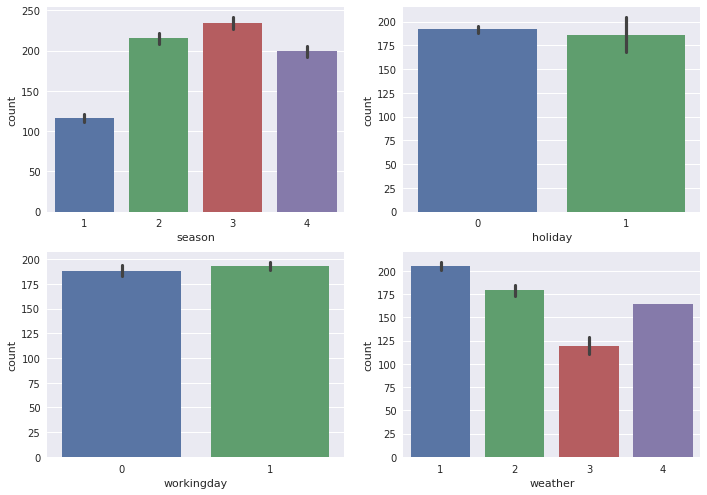

In [73]:
## Data Visualization

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.barplot(dataset['season'],dataset['count'],ax=ax[0,0]);
sns.barplot(dataset['holiday'],dataset['count'],ax=ax[0,1]);
sns.barplot(dataset['workingday'],dataset['count'],ax=ax[1,0]);
sns.barplot(dataset['weather'],dataset['count'],ax=ax[1,1]);





The above plots show us intuitively how count parameter differs with workingday, weather, season, holiday


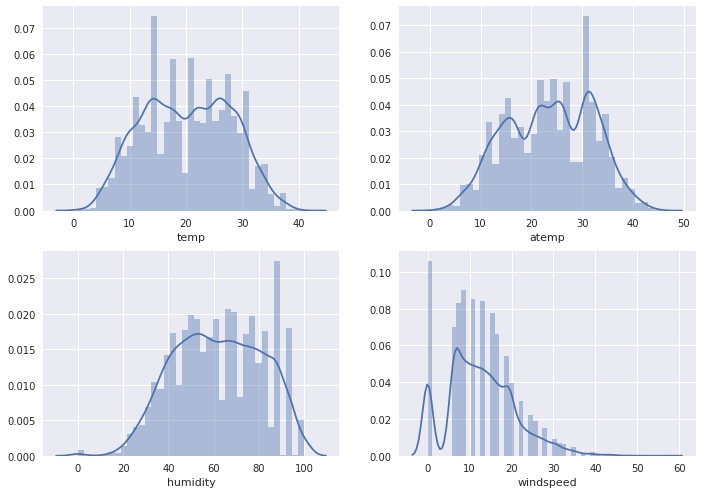

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(dataset['temp'],ax=ax[0,0]);
sns.distplot(dataset['atemp'],ax=ax[0,1]);
sns.distplot(dataset['humidity'],ax=ax[1,0]);
sns.distplot(dataset['windspeed'],ax=ax[1,1]);



This are distribution plot of humidity, windspeed, temp and atemp


In [74]:
# Dropping Highly Correlated Predictors. The Collinear Predictors// MultiCollinearity

train= dataset.drop(labels=["atemp"], axis=1)
test= dataset.drop(labels=["atemp"], axis=1)


Let's explore the features in the dataset. First, Lets explore the distribution of various discrete features like Weather, season


In [75]:
dataset.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

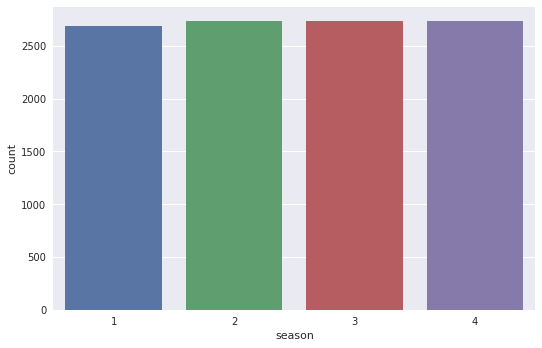

In [76]:
#sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
sns.factorplot(x='season',data=dataset,kind='count',size=5,aspect=1.5)

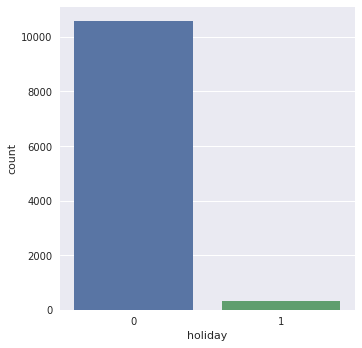

In [138]:
#holiday
dataset.holiday.value_counts()
sns.factorplot(x='holiday',data=dataset,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

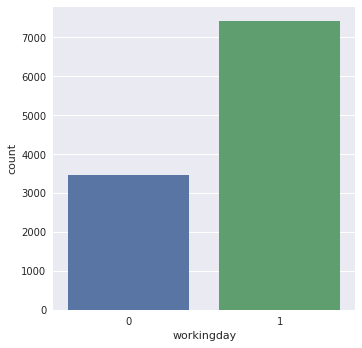

In [139]:
#holiday
dataset.workingday.value_counts()
sns.factorplot(x='workingday',data=dataset,kind='count',size=5,aspect=1) # majority of data is for working days.

In [13]:
#weather
dataset.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

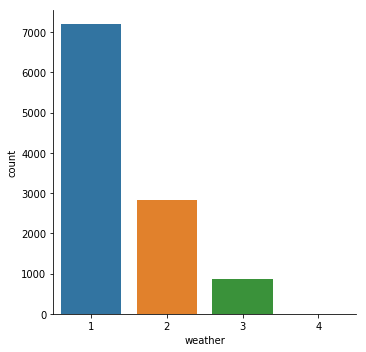

In [14]:
sns.factorplot(x='weather',data=dataset,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter


The Most Important thing is to split the date and time of the day as the time  of the day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes



In [77]:
dataset["hour"] = [t.hour for t in pd.DatetimeIndex(dataset.datetime)]
dataset["day"] = [t.dayofweek for t in pd.DatetimeIndex(dataset.datetime)]
dataset["month"] = [t.month for t in pd.DatetimeIndex(dataset.datetime)]
dataset['year'] = [t.year for t in pd.DatetimeIndex(dataset.datetime)]
dataset['year'] = dataset['year'].map({2011:0, 2012:1})
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [78]:
# Dropping the Date Time Column

dataset.drop('datetime',axis=1,inplace=True)
dataset.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0


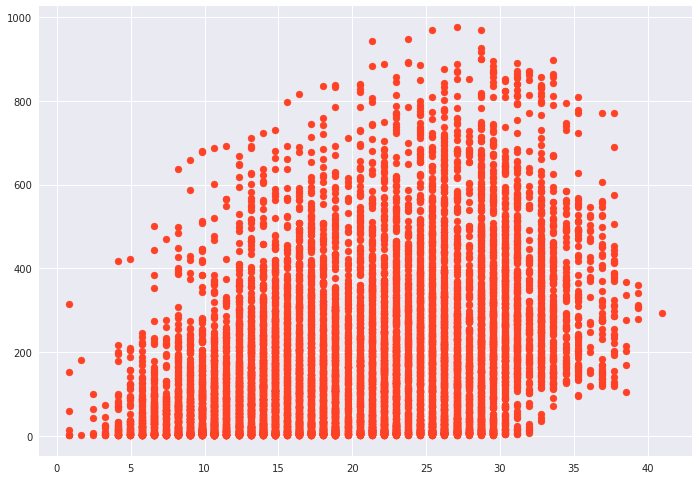

In [142]:

# for temp
plt.scatter(x="temp",y="count",data=dataset,color='#ff4125')



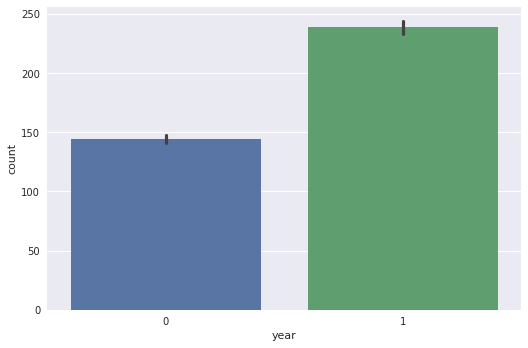

In [143]:

sns.factorplot(x="year",y="count",data=dataset,kind='bar',size=5,aspect=1.5)
# 0 for 2011 and 1 for 2012. Hence demand has increased over the years.


## Feature Engineering 

In [79]:
# Separating the Season Column as per values to enhance performance

season=pd.get_dummies(dataset['season'],prefix='season')
dataset=pd.concat([dataset,season],axis=1)
dataset.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,season_1,season_2,season_3,season_4
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0,1,0,0,0


In [80]:
# Separating the Weather Column as per values to enhance performance

weather=pd.get_dummies(dataset['weather'],prefix='weather')
dataset=pd.concat([dataset,weather],axis=1)
dataset.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,1,0,1,0,0,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,1,0,1,0,0,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,...,1,0,1,0,0,0,1,0,0,0


In [81]:
## Creating Dummy Variables for the Categorical Variables

weather=pd.get_dummies(dataset['weather'])
daily_Data=pd.concat([dataset,weather],axis=1)


In [82]:

# Dropping the Weather and Season Columns

dataset.drop(['season','weather'],inplace=True,axis=1)
dataset.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,0,...,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,2,...,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,3,...,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,4,...,1,0,1,0,0,0,1,0,0,0


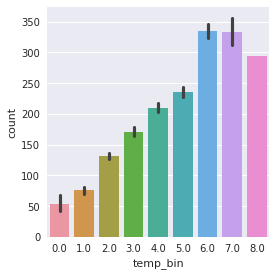

In [84]:
new_df=dataset.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

The demand is highest for bins 6 and 7 which is about tempearure 30-35(bin 6) and 35-40 (bin 7).

In [51]:

dataset.columns.to_series().groupby(dataset.dtypes).groups



{dtype('uint8'): Index([u'season_1', u'season_2', u'season_3', u'season_4', u'weather_1',
        u'weather_2', u'weather_3', u'weather_4'],
       dtype='object'),
 dtype('int64'): Index([u'holiday', u'workingday', u'humidity', u'casual', u'registered',
        u'count', u'hour', u'day', u'month', u'year'],
       dtype='object'),
 dtype('float64'): Index([u'temp', u'atemp', u'windspeed'], dtype='object')}

In [85]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [86]:
x = dataset.drop('count', axis=1).values  
y = dataset['count'].values

#set seed for reproducability
SEED = 42

#Split dataset into 70% train, 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [21]:

x_train,x_test,y_train,y_test=train_test_split(dataset.drop('count',axis=1),dataset['count'],test_size=0.3,random_state=42)

In [87]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    



{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.016113797684843167,
  0.751470486666018,
  0.017074531342949714,
  1.4534723949239339,
  0.13069020444591628]}

In [88]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.016114
1,AdaBoostRegressor,0.751470
2,BaggingRegressor,0.017075
3,SVR,1.453472
4,KNeighborsRegressor,0.130690


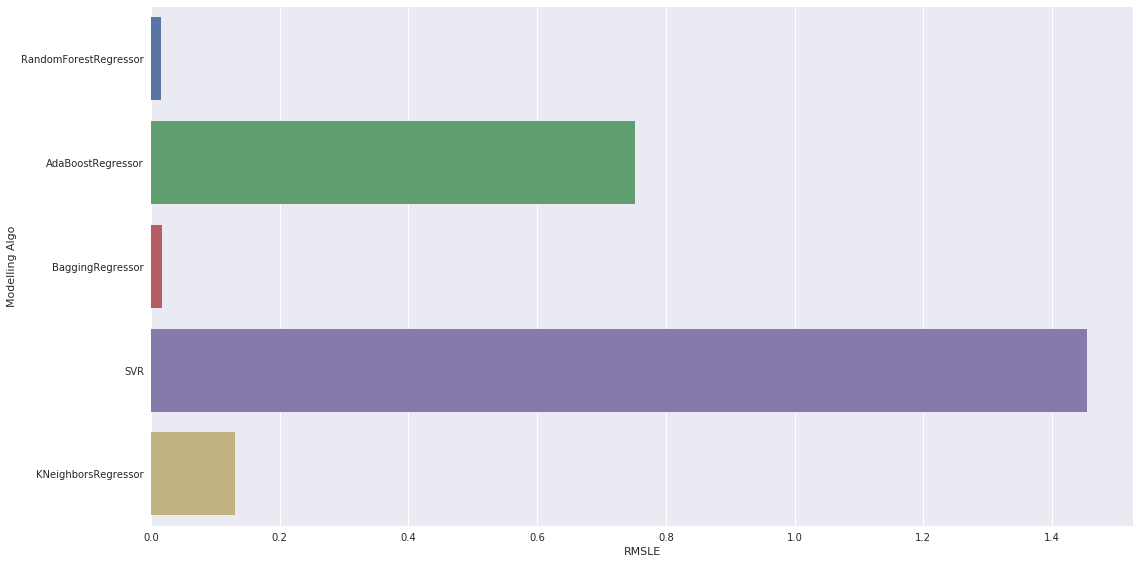

In [89]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=8,aspect=2)

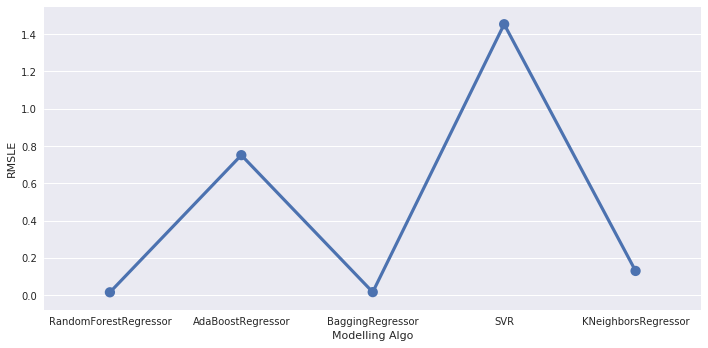

In [91]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [ ]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

In [ ]:
clf_rf.best_params_

In [94]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.13069020444591628


In [95]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

In [ ]:
# Saving the predictions to a csv file for predictions

pred=clf_rf.predict(test_df.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False) 

# Advanced Modelling

In [97]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [98]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
lModel.fit(X = x_train,y = np.log1p(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
# Make predictions
preds = lModel.predict(X= x_test)
print ("RMSLE Value For Linear Regression In Validation: ",rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))

('RMSLE Value For Linear Regression In Validation: ', 0.6658014685417074)


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor


sc = StandardScaler()

In [101]:
X =dataset.drop('count',axis=1)
y = dataset['count']
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_pred_rf))

0.016431894824243412



The above Random Forest model is using default parameter of the Random forest model to reduse RMSLE more we will do hyperparameter tuning the parameters considered are listed below


In [103]:
n_estimators = [int(x) for x in range(200,2000,100)]
max_feature = ['auto','sqrt']
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
max_depth = [int(x) for x in range(10,110,11)]
max_depth.append(None)

In [104]:
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_feature,
              'min_samples_leaf': min_sample_leaf,
              'min_samples_split': min_sample_split}

In [105]:
random_grid

{'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 109, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900]}

Now we will find the optimal solution using RandomizedSearchCV, the estimator will be Random Forest and parameters will be all the parameters in random_grid

In [106]:
rf_tune = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tune,param_distributions=random_grid,n_iter=100,cv=5,verbose= 2,n_jobs=-1)



by running rf_random(X_train,y_train) we will get the optimal parameter as below

    max_depth=87
    max_features='auto'
    min_samples_leaf=1
    min_samples_split=2
    n_estimators=1300

now we will make final Random forest model with hyperparameters


In [107]:
final_rf = RandomForestRegressor(max_depth=87,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1300)
final_model_rf = final_rf.fit(X_train,y_train)
y_final_pred = final_model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_final_pred))

0.014014330428342851

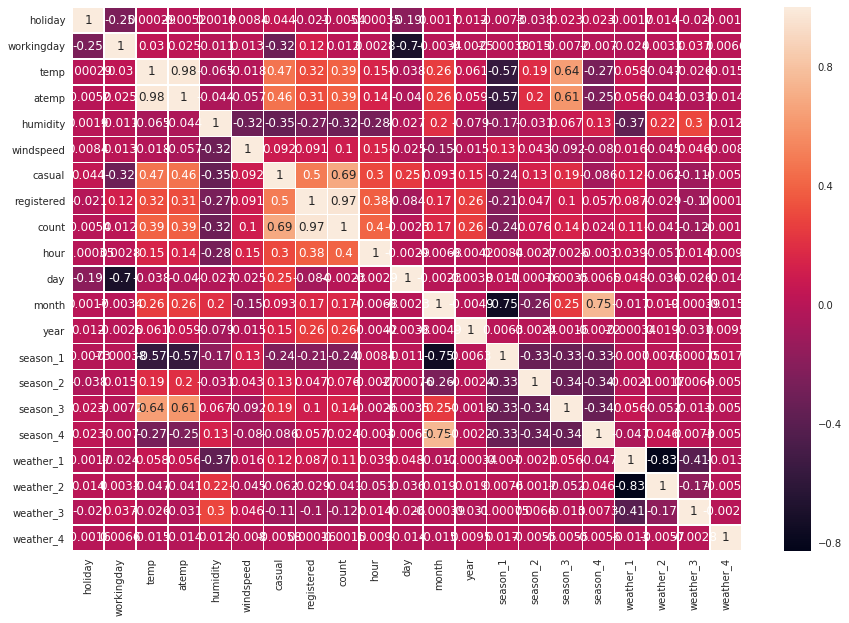

In [108]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5);

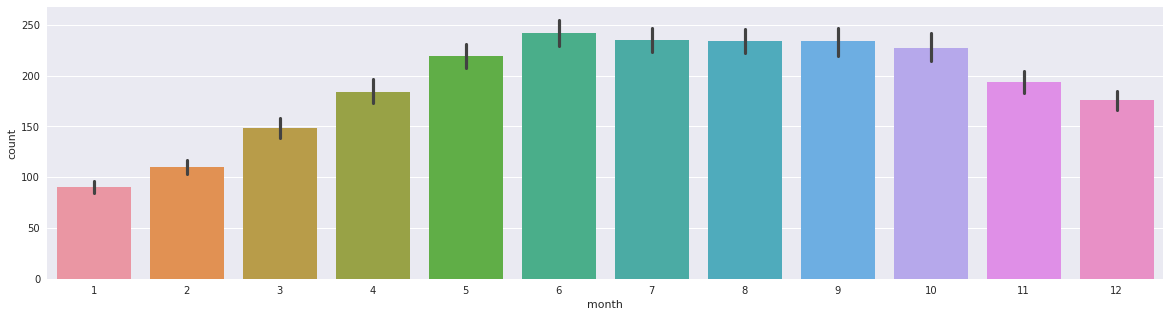

In [110]:
# Correlation PLot Visualization of Months and the Target Variable

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=dataset['month'],y=dataset['count']);



The above plot explains the demand of the bicycle according to month.


In [ ]:
dataset.drop(['casual','registered'],axis=1,inplace=True)

In [ ]:
dataset.head(3)

In [ ]:
sns.boxplot(dataset['count'])
plt.show()

# Univariate Analysis for the Continuous Numerical Variables

In [ ]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()

Text(0.5,0,'holiday')

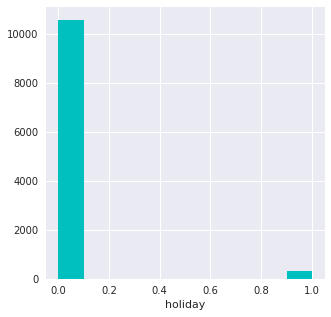

In [112]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="holiday", data=dataset,color='c');
plt.xlabel("holiday")

In [113]:


dataset.holiday.value_counts()



0    10575
1      311
Name: holiday, dtype: int64

Text(0.5,0,'workingday')

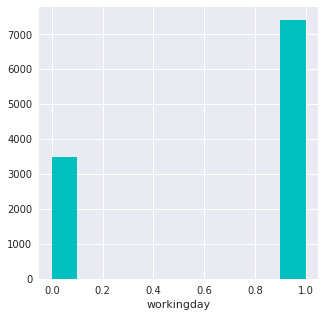

In [114]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="workingday",data=dataset,color='c');
plt.xlabel("workingday")

In [ ]:
# Histogram

plt.hist(x="temp",data=daily_Data,edgecolor="black",linewidth=2)

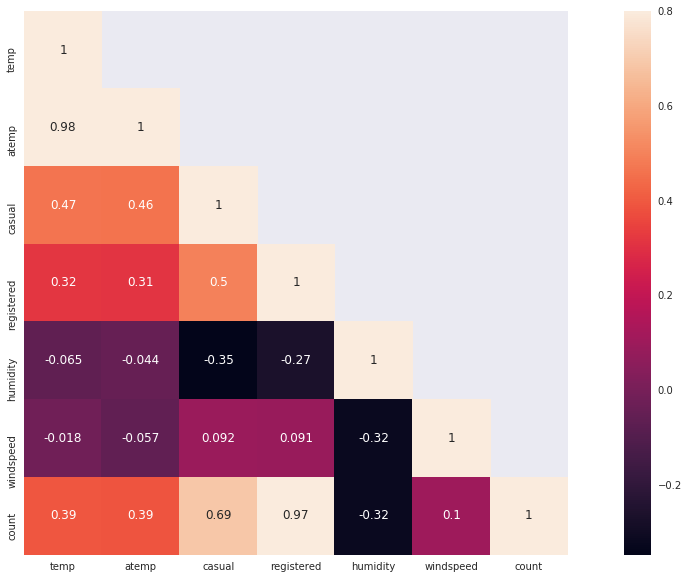

In [116]:
#correlation
corrMatt = dataset[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:


dataset=dataset.drop("datetime",axis=1)



In [119]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
reg=reg.fit(X_train, y_train)
feat=(reg.feature_importances_)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(feat)

[1.87270739e-06 2.42034864e-05 4.56211669e-05 4.37830229e-05
 7.04759748e-05 5.41681311e-05 5.26942100e-02 9.46840516e-01
 4.40113977e-05 9.82229866e-05 3.31175042e-05 6.52036341e-06
 2.61314687e-06 6.36420789e-06 7.47039952e-06 5.38718280e-06
 1.03249976e-05 8.14381538e-06 2.97263987e-06 7.19264656e-10]


(array([18.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([7.19264656e-10, 3.15613512e-02, 6.31227017e-02, 9.46840523e-02,
        1.26245403e-01, 1.57806753e-01, 1.89368104e-01, 2.20929454e-01,
        2.52490805e-01, 2.84052155e-01, 3.15613506e-01, 3.47174856e-01,
        3.78736207e-01, 4.10297557e-01, 4.41858908e-01, 4.73420258e-01,
        5.04981609e-01, 5.36542959e-01, 5.68104310e-01, 5.99665661e-01,
        6.31227011e-01, 6.62788362e-01, 6.94349712e-01, 7.25911063e-01,
        7.57472413e-01, 7.89033764e-01, 8.20595114e-01, 8.52156465e-01,
        8.83717815e-01, 9.15279166e-01, 9.46840516e-01]),
 <a list of 30 Patch objects>)

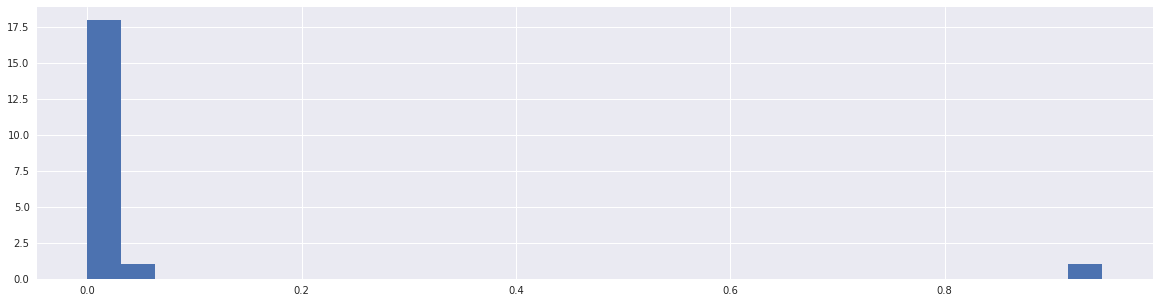

In [120]:


plt.hist(feat,bins=30)



In [121]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.005
RMSLE test: 0.014
R2 train: 1.000
R2 test: 1.000


In [124]:
dataset.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,0,...,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,2,...,1,0,1,0,0,0,1,0,0,0
